In [1]:
import numpy as np
import pandas
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVR
import pickle
import matplotlib.pyplot as plt

# Constants

In [2]:
# file_path = "/nfs/lab/varpred/Final_Results/final_matrices/"
file_path = "./"
t1d_mat = file_path + "T1D_new_04_09_short.bed"
t2d_mat = file_path + "T2D_new_04_09_short.bed"
# topmed_mat = file_path + "topmed_final.bed"

# Data Ingestion

In [3]:
t1d_data = pandas.read_csv(t1d_mat, sep='\s+')
t2d_data = pandas.read_csv(t2d_mat, sep='\s+')
# topmed_data = pandas.read_csv(topmed_mat, sep=' ')

t1d_labels = t1d_data["Probability"]
t1d_data = t1d_data.drop(['Locus', 'VarID', 'Probability'], axis=1)
t2d_labels = t2d_data["Probability"]
t2d_data = t2d_data.drop(['Locus', 'VarID', 'Probability'], axis=1)
# topmed_labels = topmed_data["Probability"]
# topmed_data = topmed_data.drop(['VarID', 'Probability'], axis=1)

# PCA

In [4]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(t1d_data)

,Acinar_peaks_bin,Alpha_peaks_bin,Beta_peaks_bin,Delta_peaks_bin,Ductal_peaks_bin,Endo_peaks_bin,Gamma_peaks_bin,Immune_peaks_bin,Stellate_peaks_bin,Acinar_peaks,...,TP5,TP6,USF,YY1.like,ZEB,ZFX.ZFY,ZNF,ZNF76.like,PC1,PC2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5807.109066,435.672275
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5820.514766,467.832215
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5804.784030,439.927309
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5819.132066,464.791748
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5820.514766,467.832215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5820.514766,467.832215
12374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5590.284687,204.914997
12375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5781.148327,412.022609
12376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5753.823633,337.597331


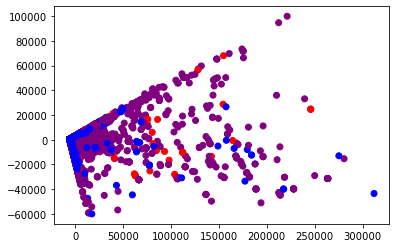

In [5]:
# Categorical labelling
def label_prob(prob, prob_threshold_high, prob_threshold_low):
    if prob > prob_threshold_high:
        return 1
    elif prob < prob_threshold_low:
        return 0
    else:
        return -1
    
t1d_labels_thresh = t1d_labels.apply(lambda row: label_prob(row, 0.01, 0.000007))

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
color_map = ['purple', 'red', 'blue']
colors = [color_map[t1d_labels_thresh[x] + 1] for x in range(len(t1d_labels_thresh.values))]
ax.scatter(new_data[:,0], new_data[:,1], color=colors)

# ax.set_xlabel("PC 1", size=15)
# ax.set_ylabel("PC 2", size=15)
# ax.set_xticklabels(ax.get_xticks(), size=12)
# ax.set_yticklabels(ax.get_yticks(), size=12)
# ax.spines["top"].set_visible(False);
# ax.spines["right"].set_visible(False);
# ax.get_xaxis().tick_bottom();
# ax.get_yaxis().tick_left();
t1d_PCS = t1d_data.copy(deep=True)
t1d_PCS.insert(len(t1d_data.columns), "PC1", new_data[:,0])
t1d_PCS.insert(len(t1d_PCS.columns), "PC2", new_data[:,1])
# t1d_PCS.sort_values('PC1', ascending=False)[:10].to_csv('Results/top_10_PC1_vals')
t1d_PCS[t1d_PCS.PC1 <= 100]

In [6]:
t1d_less_than_100 = t1d_PCS[t1d_PCS.PC1 <= 100]
t1d_less_than_100[t1d_less_than_100.PC1 >= 0].sort_values('PC1')[:10].to_csv('Results/top_10_PC1_vals.csv', mode='a')

In [11]:
pca.fit(t1d_data)
pandas.DataFrame(pca.components_,columns=t1d_data.columns,index = ['PC-1','PC-2']).to_csv('Results/PC_columns_correlation.csv')

0.8353949761605747
PC 0 : 0.8353949761605747
PC 1 : 0.9066945758425817
PC 2 : 0.9323217829050006
PC 3 : 0.9545584771115283
PC 4 : 0.9711748649346013
PC 5 : 0.9760944650894239
PC 6 : 0.9792248450985647
PC 7 : 0.9817650479744773
PC 8 : 0.984072970425556
PC 9 : 0.9862152843016534
PC 10 : 0.9878175314668263
PC 11 : 0.9890773017233694
PC 12 : 0.9900731990489353
PC 13 : 0.9909811903930795
PC 14 : 0.9918229874356013
PC 15 : 0.9925157359944297
PC 16 : 0.9931809828087186
PC 17 : 0.9937959939939467
PC 18 : 0.9943665310841846
PC 19 : 0.9949021211989284


Text(0, 0.5, '% explained variance')

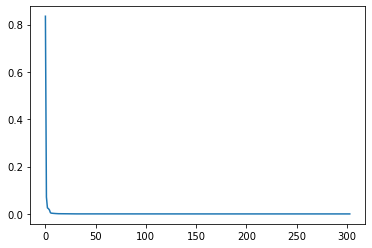

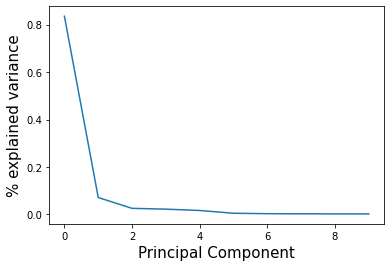

In [7]:
# my_model = PCA(n_components=0.99, svd_solver='full')
my_model = PCA()
my_model.fit_transform(t1d_data)
ratio = my_model.explained_variance_ratio_
ratio2 = my_model.explained_variance_ratio_[:10]
print(my_model.explained_variance_ratio_[0])

sumpcs = 0
for pc in range(20):
    sumpcs += my_model.explained_variance_ratio_[pc]
    print('PC', pc, ':', sumpcs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(ratio)), ratio)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(ratio2)), ratio2)
ax.set_xlabel("Principal Component", size=15)
ax.set_ylabel("% explained variance", size=15)

### Printing extreme PC1 values

In [16]:
# Raw data from csv
t1d_data_raw = pandas.read_csv(t1d_mat, sep='\s+')

# Splitting labels and data
t1d_labels_raw = t1d_data_raw["Probability"]
t1d_var_data = t1d_data_raw['VarID']
t1d_locus_data = t1d_data_raw['Locus']
t1d_data = t1d_data_raw.drop(['Locus', 'VarID', 'Probability'], axis=1)

# Filtering out variants with all 0s
print("Originally", len(t1d_data_raw), "variants.", "Filtering out", len(t1d_data_raw) - len(t1d_data_raw[(t1d_data_raw.T != 0).any()]), "variants; left with", len(t1d_data_raw[(t1d_data_raw.T != 0).any()]))

# t1d_data = t1d_data_raw[(t1d_data_raw.T != 0).any()]  # Only non-zero variants
# t1d_labels = t1d_labels_raw[t1d_labels_raw.index.isin(t1d_data.index)]  # Get matching labels
# t1d_var_idx = t1d_var_data[t1d_var_data.index.isin(t1d_data.index)]   # Get matching Variant IDs 

Originally 39305 variants. Filtering out 0 variants; left with 39305


In [17]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(t1d_data)

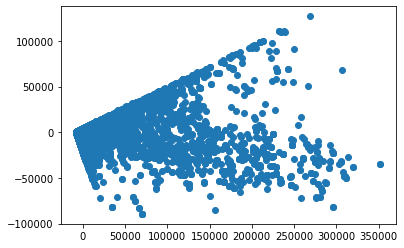

In [19]:
# Categorical labelling
def label_prob(prob, prob_threshold_high, prob_threshold_low):
    if prob > prob_threshold_high:
        return 1
    elif prob < prob_threshold_low:
        return 0
    else:
        return -1
    
t1d_labels_thresh = t1d_labels.apply(lambda row: label_prob(row, 0.01, 0.000007))

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
color_map = ['purple', 'red', 'blue']
colors = [color_map[t1d_labels_thresh[x] + 1] for x in range(len(t1d_labels_thresh.values))]
ax.scatter(new_data[:,0], new_data[:,1])

# ax.set_xlabel("PC 1", size=15)
# ax.set_ylabel("PC 2", size=15)
# ax.set_xticklabels(ax.get_xticks(), size=12)
# ax.set_yticklabels(ax.get_yticks(), size=12)
# ax.spines["top"].set_visible(False);
# ax.spines["right"].set_visible(False);
# ax.get_xaxis().tick_bottom();
# ax.get_yaxis().tick_left();
t1d_PCS = t1d_data.copy(deep=True)
t1d_PCS.insert(0, "VarID", t1d_var_data)
t1d_PCS.insert(1, "Locus", t1d_locus_data)
t1d_PCS.insert(len(t1d_data.columns), "PC1", new_data[:,0])
t1d_PCS.insert(len(t1d_PCS.columns), "PC2", new_data[:,1])
t1d_PCS.sort_values('PC1', ascending=False)[:10].to_csv('Results/t2d_top_10_PC1_vals_filtered.csv')
t1d_less_than_100 = t1d_PCS[t1d_PCS.PC1 <= 100]
t1d_less_than_100[t1d_less_than_100.PC1 >= 0].sort_values('PC1')[:10].to_csv('Results/t2d_top_10_PC1_vals_filtered.csv', mode='a')

In [ ]:
t1d_less_than_100 = t1d_PCS[t1d_PCS.PC1 <= 100]
t1d_less_than_100[t1d_less_than_100.PC1 >= 0].sort_values('PC1')[:10].to_csv('Results/top_10_PC1_vals.csv', mode='a')

# Logit Transform

12377    1.0
Name: Probability, dtype: float64


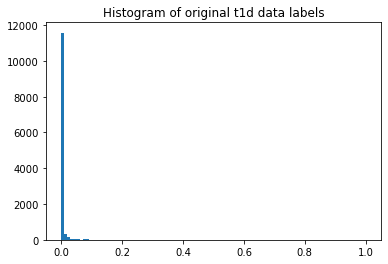

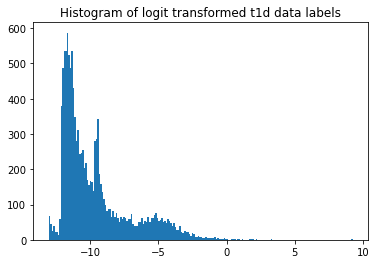

In [19]:
import matplotlib.pyplot as plt

def logit(p):
#     print(p)
    if p == 1:
        return 1
    return np.log(p / (1 - p))

print(t1d_labels[t1d_labels == 1.0])
_ = plt.hist(t1d_labels, bins=100)

plt.title("Histogram of original t1d data labels")
plt.show()

_ = plt.hist(t1d_labels.apply(lambda row: logit(row)), bins=200)

plt.title("Histogram of logit transformed t1d data labels")
plt.show()

In [15]:
high_thresh = 0.01
low_thresh = 0.00003
num_pos = len(t1d_labels[t2d_labels > high_thresh])
num_neg = len(t1d_labels[t2d_labels < low_thresh])
print("Pos, Neg, unlabelled:")
print(num_pos, num_neg, len(t1d_labels) - (num_pos + num_neg))

Pos, Neg, unlabelled:
1180 8883 14076


# Feature Selection

## Correlation

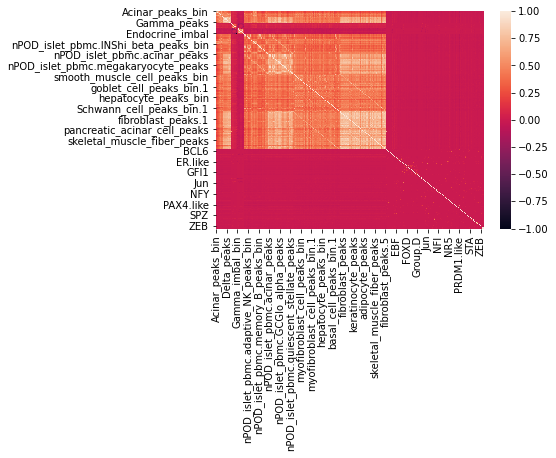

In [20]:
import seaborn as sns
corr = t1d_data.corr()
sns.heatmap(corr)

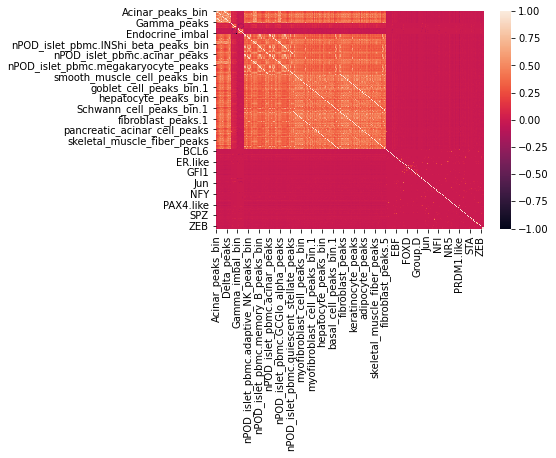

In [21]:
corr2 = t1d_data.corr(method='spearman')
sns.heatmap(corr2)

In [22]:
# Print which columns are too highly correlated
print("Columns that have correlation >= 90%, Pearson Correlation")
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
            if columns[i] != columns[j]:
                print(t1d_data.columns[i], t1d_data.columns[j])

selected_columns = t1d_data.columns[columns]
t1d_data_selected = t1d_data[selected_columns]

Columns that have correlation >= 90%, Pearson Correlation
Alpha_peaks Beta_peaks
Alpha_peaks Delta_peaks
nPOD_islet_pbmc.acinar_peaks pancreatic_acinar_cell_peaks
nPOD_islet_pbmc.activated_CD4_T_peaks nPOD_islet_pbmc.activated_CD8_T_peaks
nPOD_islet_pbmc.activated_CD4_T_peaks nPOD_islet_pbmc.naive_CD4_T_peaks
nPOD_islet_pbmc.activated_CD4_T_peaks nPOD_islet_pbmc.naive_CD8_T_peaks
nPOD_islet_pbmc.activated_CD4_T_peaks nPOD_islet_pbmc.regulatory_T_peaks
nPOD_islet_pbmc.adaptive_NK_peaks nPOD_islet_pbmc.cytotoxic_NK_peaks
nPOD_islet_pbmc.classical_monocyte_peaks nPOD_islet_pbmc.nonclassical_monocyte_peaks
nPOD_islet_pbmc.memory_B_peaks nPOD_islet_pbmc.naive_B_peaks
Schwann_cell_peaks_bin.1 Schwann_cell_peaks.1
T_cell_peaks T_cell_peaks.1
fibroblast_peaks fibroblast_peaks.2
endothelial_cell_peaks endothelial_cell_peaks.1
luminal_epithelial_cell_of_prostatic_duct_peaks mammary_gland_epithelial_cell_peaks
smooth_muscle_cell_peaks.1 vascular_associated_smooth_muscle_cell_peaks
smooth_muscle_c

In [23]:
# Print which columns are too highly correlated
print("Columns that have correlation >= 90%, Spearman Correlation")
columns = np.full((corr2.shape[0],), True, dtype=bool)
for i in range(corr2.shape[0]):
    for j in range(i+1, corr2.shape[0]):
        if corr2.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
            if columns[i] != columns[j]:
                print(t1d_data.columns[i], t1d_data.columns[j])

selected_columns = t1d_data.columns[columns]
t1d_data_selected = t1d_data[selected_columns]

Columns that have correlation >= 90%, Spearman Correlation
Acinar_peaks_bin Acinar_peaks
Alpha_peaks_bin Alpha_peaks
Beta_peaks_bin Beta_peaks
Delta_peaks_bin Delta_peaks
Ductal_peaks_bin Ductal_peaks
Endo_peaks_bin Endo_peaks
Gamma_peaks_bin Gamma_peaks
Immune_peaks_bin Immune_peaks
Stellate_peaks_bin Stellate_peaks
nPOD_islet_pbmc.acinar_peaks_bin nPOD_islet_pbmc.acinar_peaks
nPOD_islet_pbmc.activated_CD4_T_peaks_bin nPOD_islet_pbmc.activated_CD4_T_peaks
nPOD_islet_pbmc.activated_CD8_T_peaks_bin nPOD_islet_pbmc.activated_CD8_T_peaks
nPOD_islet_pbmc.activated_stellate_peaks_bin nPOD_islet_pbmc.activated_stellate_peaks
nPOD_islet_pbmc.adaptive_NK_peaks_bin nPOD_islet_pbmc.adaptive_NK_peaks
nPOD_islet_pbmc.classical_monocyte_peaks_bin nPOD_islet_pbmc.classical_monocyte_peaks
nPOD_islet_pbmc.conventional_dendritic_peaks_bin nPOD_islet_pbmc.conventional_dendritic_peaks
nPOD_islet_pbmc.cytotoxic_NK_peaks_bin nPOD_islet_pbmc.cytotoxic_NK_peaks
nPOD_islet_pbmc.ductal_peaks_bin nPOD_islet_pbm

## Understanding Duplicates

In [11]:
len(t1d_data[t1d_data.duplicated(keep=False)])

6338

In [14]:
len(t1d_data[t1d_data.duplicated(keep=False)])

18355

In [8]:
len(t2d_data[t2d_data.duplicated(keep=False)])

24484

In [9]:
dups = t1d_data[t1d_data.duplicated(keep=False)]

In [10]:
dups

,Acinar_peaks_bin,Alpha_peaks_bin,Beta_peaks_bin,Delta_peaks_bin,Ductal_peaks_bin,Endo_peaks_bin,Gamma_peaks_bin,Immune_peaks_bin,Stellate_peaks_bin,Acinar_peaks,...,TFA,THA,TP5,TP6,USF,YY1.like,ZEB,ZFX.ZFY,ZNF,ZNF76.like
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Grouping dups
itr = dups.iterrows()
groups = []
group_idxs = []
group_probs = []

# vals = []
for index,row in dups.iterrows():
    grouped = False
    for gidx in range(len(groups)):
        group = groups[gidx]
        if np.all(row == group[0]):
            group.append(row)
            group_idxs[gidx].append(index)
            group_probs[gidx].append(t1d_labels.iloc[index])
            grouped = True
            break
    if not grouped:
        groups.append([row])
        group_idxs.append([index])
        group_probs.append([t1d_labels.iloc[index]])

In [ ]:
for group in group_idxs:
    print(len(group))

In [ ]:
for group in group_probs:
    if len(group) > 1:
        print(group)

In [3]:
t1d_data = pandas.read_csv(t1d_mat, sep='\s+')

In [7]:
no_dups = t1d_data.drop_duplicates(subset=['VarID'])

In [8]:
d = no_dups.drop(['Locus', 'VarID', 'Probability'], axis=1)

In [11]:
dups = d[d.duplicated(keep=False)]

In [12]:
len(dups)

14338

In [14]:
print(len(t1d_data), len(no_dups))

31341 28612


In [17]:
t1d_labels = t1d_data["Probability"]

In [3]:
t1d_data = pandas.read_csv(t1d_mat, sep='\s+')

In [5]:
print("Original length", len(t1d_data))
t1d_data = t1d_data.sort_values(by=['Probability'])
t1d_no_var_dups = t1d_data.drop_duplicates(subset=['VarID'])
print("No var dups length", len(t1d_no_var_dups), 'num var dups', len(t1d_data) - len(t1d_no_var_dups))
t1d_no_val_dups = t1d_no_var_dups.drop(['Locus', 'VarID', 'Probability'], axis=1).duplicated(keep=False)

Original length 31341
No var dups length 28612 num var dups 2729


In [7]:
len(t1d_no_val_dups[t1d_no_val_dups])

14338